# CS 273P Homework 4
Shefali Gupta | 57806943

# Problem 1 : Decision Trees

1 a) Entropy of y = 6/10*log(10/6)+4/10*log(10/4)
                   = 0.44218+0.52877 = 0.97095

1 b) Information Gain (X)= H(Y)  - H(Y|X)
# X1 =  0.97095 - ((4/10)((3/4) log(4/3)+(1/4)log4) + (6/10)((1/2)log2+(1/2)log2))
#    = 0.97095 - ( 0.32451+0.6) 
#    = 0.4644 bits
# X2 = 0.97095 - ( 5/10 ( 1/5 log 5 + 4/5 log 5/4 ) + 5/10 ( 6 log 6 + 0 log 0 ) )
#    = 0.97095 - ( 0.36096+0 )
#    = 0.60999
# X3 = 0.97095 - ( 3/10 ( 2/3 log 3/2 + 1/3 log 3 ) + 7/10 ( 4/7 log 7/4 + 3/7 log 7/3 ) )
#    = 0.97095 = ( 0.27548 + 0.68965 )
#    = 0.00582
# X4 = 0.97095 - ( 3/10 ( 1/3 log 3 + 2/3 log 3/2 ) + 7/10 ( 5/7 log 7/5 + 2/7 log 7/2 ) )
#    = 0.97095 - ( 0.27548 + 0.60418 )
#    = 0.09129
# X5 = 0.97095 - ( 7/10 ( 4/7 log 7/4 + 3/7 log 7/3) + 3/10 ( 2/3 log 3/2 + 1/3 log 3 ))
#    = 0.97095 - ( 0.68965 + 0.27548 )
#    = 0.00582
    
# Splitting should happen on feature X2 first.
 

1 c)

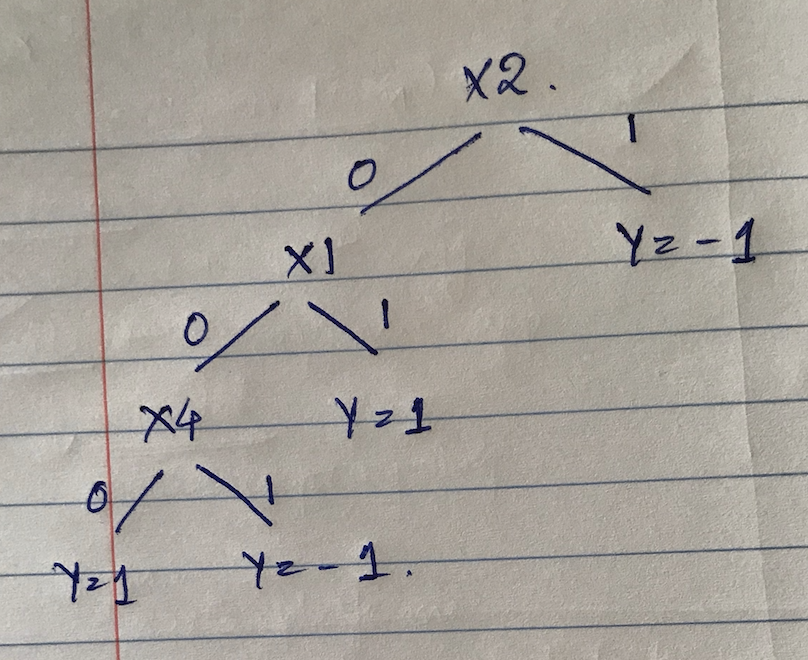

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
np.random.seed(0)

# Problem 2 : Decision Trees on Kaggle

2a

In [2]:
dataX=np.genfromtxt("X_train.txt",delimiter=None)
dataY=np.genfromtxt("Y_train.txt",delimiter=None)
#Taking 0-10000 as Training data
#Xtr=dataX[0:10000,0:3]
Xtr=dataX[0:10000,]
Ytr=dataY[0:10000,]
#Taking 10001-20000 as Validation data
Xte=dataX[10000:20000,]
Yte=dataY[10000:20000,]

#Size of training data=  Rows=10000 (1-10000) , Columns=14

#Size of test data = Rows= 10000 (10001-20000) , Columns =14

2b

In [3]:
#Learn a decision tree classifier on the data
learnerTr = ml.dtree.treeClassify(Xtr,Ytr, maxDepth=50)
mseTr=learnerTr.err(Xtr,Ytr)
mseTe=learnerTr.err(Xte,Yte)
print("Max depth = 50")
print("Error of training data = "+str(mseTr))
print("Error of test data = "+str(mseTe))

Max depth = 50
Error of training data = 0.0047
Error of test data = 0.3816


2c

Max Depth: 0 , Training error: 0.3418 , Test error: 0.3419
Max Depth: 1 , Training error: 0.3418 , Test error: 0.3419
Max Depth: 2 , Training error: 0.3223 , Test error: 0.3191
Max Depth: 3 , Training error: 0.3133 , Test error: 0.3126
Max Depth: 4 , Training error: 0.3105 , Test error: 0.3152
Max Depth: 5 , Training error: 0.3008 , Test error: 0.3102
Max Depth: 6 , Training error: 0.2949 , Test error: 0.3103
Max Depth: 7 , Training error: 0.2872 , Test error: 0.3118
Max Depth: 8 , Training error: 0.277 , Test error: 0.313
Max Depth: 9 , Training error: 0.2632 , Test error: 0.3186
Max Depth: 10 , Training error: 0.2455 , Test error: 0.3243
Max Depth: 11 , Training error: 0.2309 , Test error: 0.3258
Max Depth: 12 , Training error: 0.2088 , Test error: 0.3344
Max Depth: 13 , Training error: 0.1923 , Test error: 0.3431
Max Depth: 14 , Training error: 0.1648 , Test error: 0.3439
Max Depth: 15 , Training error: 0.1454 , Test error: 0.3575


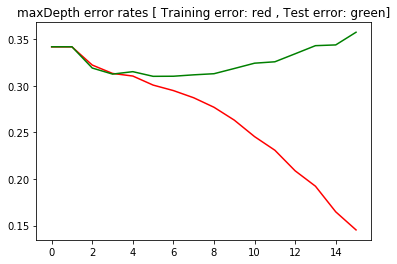

In [4]:
# With max depth parameter from 0 - 15
mseTRL=[]
mseTEL=[]
for i in range(0,16):
    learner2TR=ml.dtree.treeClassify(Xtr,Ytr,maxDepth=i)
    mseTR2=learner2TR.err(Xtr,Ytr)
    mseTE2=learner2TR.err(Xte,Yte)
    mseTRL.append(mseTR2)
    mseTEL.append(mseTE2)
    print("Max Depth: "+str(i)+" , Training error: "+str(mseTR2)+" , Test error: "+str(mseTE2))
_,axis=plt.subplots() 
plt.title("maxDepth error rates [ Training error: red , Test error: green]")
axis.plot(mseTRL,c='red')
axis.plot(mseTEL,c='green')
plt.show()

    

Complexity increases as depth increases. The most ideal depth is 6 as we get minimum test error at this depth. Before this depth the learner underfits, whereas starts overfitting right after this depth.

2d

MinLeaf: 4 , Training error: 0.0964 , Test error: 0.3794
MinLeaf: 8 , Training error: 0.1692 , Test error: 0.3755
MinLeaf: 16 , Training error: 0.2256 , Test error: 0.3546
MinLeaf: 32 , Training error: 0.2637 , Test error: 0.3335
MinLeaf: 64 , Training error: 0.2899 , Test error: 0.3276
MinLeaf: 128 , Training error: 0.3012 , Test error: 0.3119
MinLeaf: 256 , Training error: 0.3085 , Test error: 0.3172
MinLeaf: 512 , Training error: 0.3135 , Test error: 0.3127
MinLeaf: 1024 , Training error: 0.3223 , Test error: 0.3191
MinLeaf: 2048 , Training error: 0.3418 , Test error: 0.3419
MinLeaf: 4096 , Training error: 0.3418 , Test error: 0.3419


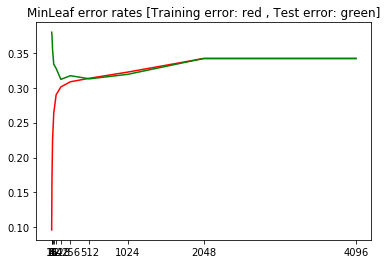

In [5]:
#Minleaf 2^2 to 2^12
mseTRL=[]
mseTEL=[]
for j in range(2,13):
    learnerTR=ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minLeaf=2**j)
    mseTR2=learnerTR.err(Xtr,Ytr)
    mseTE2=learnerTR.err(Xte,Yte)
    mseTRL.append(mseTR2)
    mseTEL.append(mseTE2)
    print("MinLeaf: "+str(2**j)+" , Training error: "+str(mseTR2)+" , Test error: "+str(mseTE2))
_,axis=plt.subplots()
plt.title("MinLeaf error rates [Training error: red , Test error: green]")
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTRL,c='red')
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTEL,c='green')
axis.set_xticks([4,8,16,32,64,128,256,512,1024,2048,4096])
plt.show()

Complexity decreases as minLeaf grows because the training error continues to increase with increasing value of minLeaf. Ideal value of minLeaf is 128, where the test error has minimum value. minLeaf lesser than 128 underfits the model, whereas a value greater than 128 overfits it.

2 e

MinParent: 4 , Training error: 0.0233 , Test error: 0.3796
MinParent: 8 , Training error: 0.0624 , Test error: 0.3758
MinParent: 16 , Training error: 0.1179 , Test error: 0.3709
MinParent: 32 , Training error: 0.183 , Test error: 0.3654
MinParent: 64 , Training error: 0.2255 , Test error: 0.3467
MinParent: 128 , Training error: 0.2621 , Test error: 0.3343
MinParent: 256 , Training error: 0.2821 , Test error: 0.3197
MinParent: 512 , Training error: 0.302 , Test error: 0.3121
MinParent: 1024 , Training error: 0.3078 , Test error: 0.3149
MinParent: 2048 , Training error: 0.3218 , Test error: 0.3192
MinParent: 4096 , Training error: 0.3418 , Test error: 0.3419


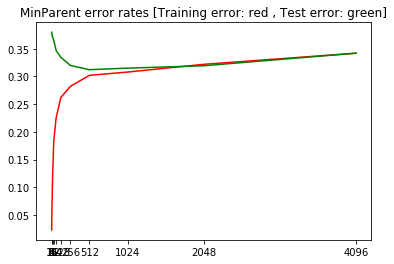

In [6]:
# minParent ranging from 2^2 to 2^12
mseTRL=[]
mseTEL=[]
for j in range(2,13):
    learnerTR=ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minParent=2**j)
    mseTR2=learnerTR.err(Xtr,Ytr)
    mseTE2=learnerTR.err(Xte,Yte)
    mseTRL.append(mseTR2)
    mseTEL.append(mseTE2)
    print("MinParent: "+str(2**j)+" , Training error: "+str(mseTR2)+" , Test error: "+str(mseTE2))
_,axis=plt.subplots()
plt.title("MinParent error rates [Training error: red , Test error: green]")
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTRL,c='red')
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTEL,c='green')
axis.set_xticks([4,8,16,32,64,128,256,512,1024,2048,4096])
plt.show()

Ideal value of minParent is 512.

2 f

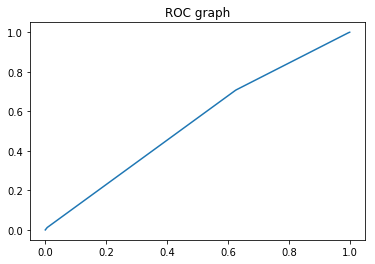

AUC for maxDepth 50 is 0.5812224819257972


In [7]:
# ROC curve and AUC ( area under curve) for maxDepth= 50
learnerTR=ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50)
ROC=learnerTR.roc(Xte,Yte)
plt.plot(ROC[0],ROC[1])
plt.title("ROC graph")
plt.show()
AUC=learnerTR.auc(Xte,Yte)
print("AUC for maxDepth 50 is "+str(AUC))


2 g

In [8]:
# Predictions keeping values of maxDepth=6 , minLeaf=128 and minParent=512
nXte=np.genfromtxt("X_test.txt",delimiter=None)
learnerTR=ml.dtree.treeClassify(Xtr,Ytr,maxDepth=6,minLeaf=128,minParent=512)
Ypred=learnerTR.predictSoft(nXte)
np.savetxt('Gupta_6943.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

# Problem 3: Random Forests

3a

1 Ensemble members: mseTR= 0.2372 , mseTE= 0.3739
5 Ensemble members: mseTR= 0.126092 , mseTE= 0.23521600000000004
10 Ensemble members: mseTR= 0.11668600000000001 , mseTE= 0.22211999999999998
25 Ensemble members: mseTR= 0.11106112 , mseTE= 0.21510464


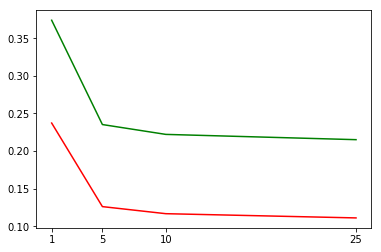

In [9]:
ensemble=[0]*25
Ytrhat=np.zeros((np.size(Ytr),25))
Ytehat=np.zeros((np.size(Yte),25))
for i in range(25):
    Xb,Yb=ml.bootstrapData(Xtr,Ytr)
    ensemble[i]=ml.dtree.treeClassify(Xb,Yb,maxDepth=15,minLeaf=4,nFeatures=60)
    Ytrhat[:,i]=ensemble[i].predict(Xtr)
    Ytehat[:,i]=ensemble[i].predict(Xte)
    
#mseTR and mseTE for learners [1,5,10,25]
mseTR=[]
mseTE=[]
for index,value in enumerate([1,5,10,25]):
    mseTR.append(np.mean((Ytr-np.mean(Ytrhat[:,0:value],1))**2))
    mseTE.append(np.mean((Yte-np.mean(Ytehat[:,0:value],1))**2))
    print(str(value)+" Ensemble members: mseTR= "+str(mseTR[index])+" , mseTE= "+str(mseTE[index]))
_,axis=plt.subplots()
axis.plot([1,5,10,25],mseTR,c='red')
axis.plot([1,5,10,25],mseTE,c='green')
axis.set_xticks([1,5,10,25])
plt.show()

3 b

In [37]:
#Uploading results on Kaggle
Xtr=np.genfromtxt("X_train.txt",delimiter=None)
Ytr=np.genfromtxt("Y_train.txt",delimiter=None)
Xtr=Xtr[0:50000,:]
Ytr=Ytr[0:50000:]
Xte=np.genfromtxt("X_test.txt",delimiter=None)
print(Xte.shape[0])
Ypred2=np.zeros((np.size(Xte,0),1))
ensemble2=[0]*25
for i in range(25):
    #sample=np.random.randint(low=10000, high=100000, size=1)
    Xb,Yb=ml.bootstrapData(Xtr,Ytr)
    #nFeat=np.random.randint(low=7,high=14,size=1)
    ensemble2[i]=ml.dtree.treeClassify(Xb,Yb,maxDepth=50,minLeaf=5,nFeatures=8,minParent=4)
    Ypred2=Ypred2+ensemble[i].predictSoft(Xte)
Ypred2=Ypred2/25
print("AUC after 25 learners: "+str(ensemble2[24].auc(Xb,Yb)))
np.savetxt('Gupta_6943.txt',
np.vstack( (np.arange(len(Ypred2)) , Ypred2[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');           



100000
AUC after 25 learners: 0.9710139455417908
